## Invest Assignment for Module 3 Deadline - 26th Oct 2020 

### Checkpoints - Part 1

#### Checkpoint 1: Data Cleaning 1

###### 1. Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.

In [196]:
import pandas as pd

In [197]:
companies=pd.read_csv('companies.csv')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [198]:
companies.shape

(66368, 10)

In [199]:
rounds2=pd.read_csv('rounds2.csv',encoding='latin1')

In [200]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [201]:
rounds2.shape

(114949, 6)

#### Table1.1


### Question 1: How many unique companies are present in rounds2?

In [202]:
# How many unique companies are present in rounds2?
len(rounds2['company_permalink'].str.upper().unique())

66373

#### Here length is 66370(Answer) of value counts. we already remove case sensitive difference by converting every company_permalink. Now we have unique values counts. Which shows the unique names

### Question 2: How many unique companies are present in companies?

In [203]:
companies.shape

(66368, 10)

In [204]:
companies['name'].value_counts()

Karma             4
Roost             4
Spire             4
Peach             4
Blink             4
                 ..
Inside            1
Nextdoor          1
Toro              1
Ion Healthcare    1
Emissary          1
Name: name, Length: 66098, dtype: int64

In [205]:
# Here company name given, using which we can get unique counts
len(companies['name'].str.lower().unique())

66034

#### Here length is 66034(Answer) of value counts. we already remove case sensitive difference by converting every name to upper. Now we have unique values counts. Which shows the unique names

## Question 3: In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.

#### To consider a column unique, any column should not have a any repetative value, only one null can allowed in column

In [206]:
## Actuall size of dataframe
companies.shape

(66368, 10)

In [207]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51148
unique,66368,66098,61191,27296,9,139,314,1097,5114,3983
top,/Organization/Innopath,Karma,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53029,37598,12899,8803,3526,2729


#### We can see in above table that only permalink, name and status have exact counts or just one empty value. Other than these multiple empties value, so can not be come in consideration of unique key

#### Statue have lots of repetative values already seen in comapanies head

#### Now we need to check unique ness of Permalink and name. Considering case sensitve values as unique values also

In [208]:
df=companies['permalink'].str.upper().value_counts().rename_axis('permalink').reset_index(name='counts')
df=df[df.counts>1]
print(df)

Empty DataFrame
Columns: [permalink, counts]
Index: []


In [209]:
df=companies['name'].str.upper().value_counts().rename_axis('name').reset_index(name='counts')
df=df[df.counts>1]
print(df)

                name  counts
0              SHIFT       4
1              BLINK       4
2             #NAME?       4
3              KARMA       4
4              SPIRE       4
..               ...     ...
292  OR PRODUCTIVITY       2
293            INTOO       2
294            OFIXU       2
295         THERENOW       2
296      META SEARCH       2

[297 rows x 2 columns]


#### From above two jupytor cells we can easily identify that only permalink have all unique values while name column have repetative values

## So answer for above question is "permalink"

## Question 4 - Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

#### We can check above question's answer by using join. Companies csv is set 1 and rounds 2 file is set 2. So finding any value of set 1 which doesn't exist in set 2. Mean Left outer join. 

In [210]:
set_1=set(companies['permalink'].str.lower())

In [211]:
len(companies['permalink'])

66368

In [212]:
len(set_1)

66368

In [213]:
set_2=set(rounds2['company_permalink'].str.lower())

In [214]:
len(rounds2['company_permalink'])

114949

In [215]:
len(set_2)

66373

#### Now check difference between set_1 to set_2.

In [216]:
len(set_2.difference(set_1))

73

In [217]:
#print(set_2.intersection(set_1))
len(set_2.intersection(set_1))

66300

### It means answer is Yes(Y)

In [218]:
#master_frame = pd.merge(companies,rounds2, how = 'left', left_on = 'permalink', right_on = 'company_permalink')

In [219]:
#master_frame.shape: (66368, 16)

##### There is difference between above left join and left join written below. In above left join we are merging rounds2 variables in companies. While in below we are merging companies variables to rounds2 data frame.
#### for reference read below link https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/

In [235]:
companies['_permalink_lower']=companies['permalink'].str.lower()

In [236]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_permalink_lower
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies


In [231]:
rounds2['_permalink_lower']=rounds2['company_permalink'].str.lower()

In [237]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,_permalink_lower
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com


### Doing left join: Merging all variables of companies to rounds2 dataframe on above created common column  "_permalink_lower". Cap or lower case doesn't change company identity.

### Removing all the rows from rounds2. which don't have any raised amount value. Our object is to find a sector where we need to invest. If a company don't have any invest than we can not know the maximum investment sector and how much money invested.

In [251]:
rounds2=rounds2[rounds2['raised_amount_usd'].notnull()]

In [254]:
rounds2['raised_amount_usd'].isna().sum()

0

#### No null value in raised amount column

In [255]:
master_frame = pd.merge(rounds2,companies,  how='left', on='_permalink_lower')

In [256]:
master_frame.shape

(94959, 17)

In [257]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,_permalink_lower,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN


In [242]:
#master_frame=pd.concat([rounds2, companies], ignore_index=True)

In [258]:
#master_frame.shape

In [259]:
#master_frame.head()

### There is difference between concat and merge. So which on we should use

##### concat() simply stacks multiple DataFrame together either vertically, or stitches horizontally after aligning on 
##### index .merge() first aligns two DataFrame' selected common column(s) or index, and then pick up the remaining columns from the aligned rows of each DataFrame.

In [260]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 94958
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        94959 non-null  object 
 1   funding_round_permalink  94959 non-null  object 
 2   funding_round_type       94959 non-null  object 
 3   funding_round_code       28169 non-null  object 
 4   funded_at                94959 non-null  object 
 5   raised_amount_usd        94959 non-null  float64
 6   _permalink_lower         94959 non-null  object 
 7   permalink                94915 non-null  object 
 8   name                     94914 non-null  object 
 9   homepage_url             90585 non-null  object 
 10  category_list            93877 non-null  object 
 11  status                   94915 non-null  object 
 12  country_code             89085 non-null  object 
 13  state_code               87334 non-null  object 
 14  region                

In [261]:
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


### Insights From master data frame


In [262]:
#master_frame.to_csv('master_frame.csv',index=False)

## Insight 1: Country most invested counts

In [268]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 94958
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        94959 non-null  object 
 1   funding_round_permalink  94959 non-null  object 
 2   funding_round_type       94959 non-null  object 
 3   funding_round_code       28169 non-null  object 
 4   funded_at                94959 non-null  object 
 5   raised_amount_usd        94959 non-null  float64
 6   _permalink_lower         94959 non-null  object 
 7   permalink                94915 non-null  object 
 8   name                     94914 non-null  object 
 9   homepage_url             90585 non-null  object 
 10  category_list            93877 non-null  object 
 11  status                   94915 non-null  object 
 12  country_code             89085 non-null  object 
 13  state_code               87334 non-null  object 
 14  region                

In [269]:
master_frame.country_code.value_counts()

USA    62043
GBR     5018
CAN     2616
CHN     1927
IND     1649
       ...  
MNE        1
BLM        1
LAO        1
UZB        1
GRD        1
Name: country_code, Length: 136, dtype: int64

### Insight 2. Which country get most money as investment

In [307]:
groupby_country_code=master_frame.groupby('country_code')

In [308]:
groupby_country_code['raised_amount_usd'].sum()

country_code
 http://www.dreamlines.com.au     3.705945e+07
ALB                               2.767440e+05
ARE                               1.570219e+09
ARG                               3.623555e+08
ARM                               2.681750e+07
                                      ...     
VNM                               3.976805e+08
ZAF                               1.074812e+09
ZMB                               5.200000e+05
ZWE                               1.003000e+07
operating                         6.610320e+05
Name: raised_amount_usd, Length: 136, dtype: float64

In [309]:
master_frame['country_code']

0        IND
1        USA
3        CHN
4        HKG
5        CAN
        ... 
94952    CHN
94953    HRV
94954    HRV
94955    HRV
94956    HRV
Name: country_code, Length: 89085, dtype: object

In [310]:
master_frame.isnull().sum(axis=0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         62149
funded_at                      0
raised_amount_usd              0
_permalink_lower               0
permalink                      0
name                           1
homepage_url                3378
category_list                578
status                         0
country_code                   0
state_code                  1751
region                      1197
city                        1194
founded_at                 13646
dtype: int64

### There are lots of null values in country code 

In [311]:
master_frame = master_frame[~(master_frame['country_code'].isnull())]

In [312]:
master_frame.isnull().sum(axis=0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         62149
funded_at                      0
raised_amount_usd              0
_permalink_lower               0
permalink                      0
name                           1
homepage_url                3378
category_list                578
status                         0
country_code                   0
state_code                  1751
region                      1197
city                        1194
founded_at                 13646
dtype: int64

In [313]:
groupby_country_code['raised_amount_usd'].sum()

country_code
 http://www.dreamlines.com.au     3.705945e+07
ALB                               2.767440e+05
ARE                               1.570219e+09
ARG                               3.623555e+08
ARM                               2.681750e+07
                                      ...     
VNM                               3.976805e+08
ZAF                               1.074812e+09
ZMB                               5.200000e+05
ZWE                               1.003000e+07
operating                         6.610320e+05
Name: raised_amount_usd, Length: 136, dtype: float64

In [314]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,_permalink_lower,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
5,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [315]:
## Dropping unnecossry column  like funding_round_permalink,permalink, permalink_lower
master_frame = master_frame.drop(['funding_round_permalink', '_permalink_lower', 'permalink', 'homepage_url'], axis = 1)

In [316]:
master_frame.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,venture,B,05-01-2015,10000000.0,#fame,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,seed,NaN,01-03-2014,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/0-6-com,venture,A,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/01games-technology,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
5,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [337]:
# check outliers in master frame
import seaborn as sns
import matplotlib.pyplot as plt

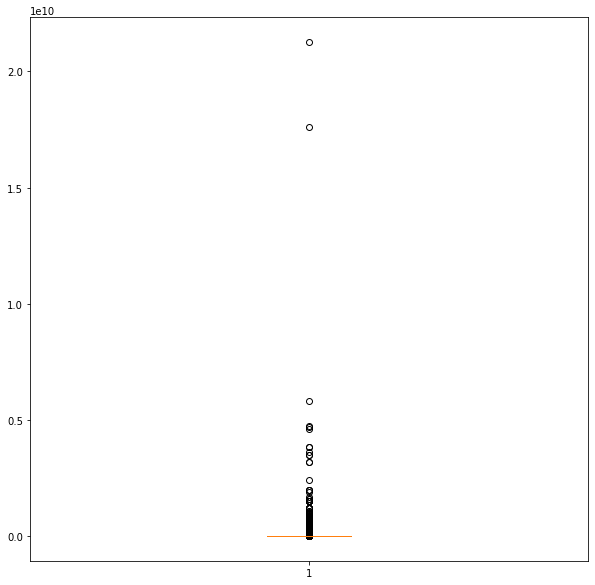

In [348]:
plt.figure(figsize=[10,10])
plt.boxplot(master_frame['raised_amount_usd'])
plt.show()

In [340]:
master_frame['raised_amount_usd'].describe()

count    8.907900e+04
mean     1.047319e+07
std      1.114786e+08
min      0.000000e+00
25%      3.700000e+05
50%      1.800000e+06
75%      7.116751e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [366]:
#convert rasied amount in million $
master_frame['raised_amount_million_usd']=(master_frame['raised_amount_usd']/1000000).astype(float)

In [365]:
master_frame.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_million_usd
0,/organization/-fame,venture,B,05-01-2015,10000000.0,#fame,Media,operating,IND,16,Mumbai,Mumbai,NaN,100.0000
1,/organization/-qounter,seed,NaN,01-03-2014,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,7.0000
3,/organization/0-6-com,venture,A,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,20.0000
4,/organization/01games-technology,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,0.4125
5,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0.4336


In [377]:
master_frame.shape

(89079, 14)

In [380]:
master_frame['raised_amount_million_usd'].describe()

count    52564.000000
mean        17.507541
std        144.706433
min          1.000001
25%          2.500000
50%          5.500000
75%         13.401915
max      21271.935000
Name: raised_amount_million_usd, dtype: float64

In [381]:
master_frame=master_frame[master_frame['raised_amount_million_usd']>1]

In [382]:
master_frame.shape

(52564, 14)

In [385]:
master_frame['raised_amount_million_usd'].describe()

count    52564.000000
mean        17.507541
std        144.706433
min          1.000001
25%          2.500000
50%          5.500000
75%         13.401915
max      21271.935000
Name: raised_amount_million_usd, dtype: float64

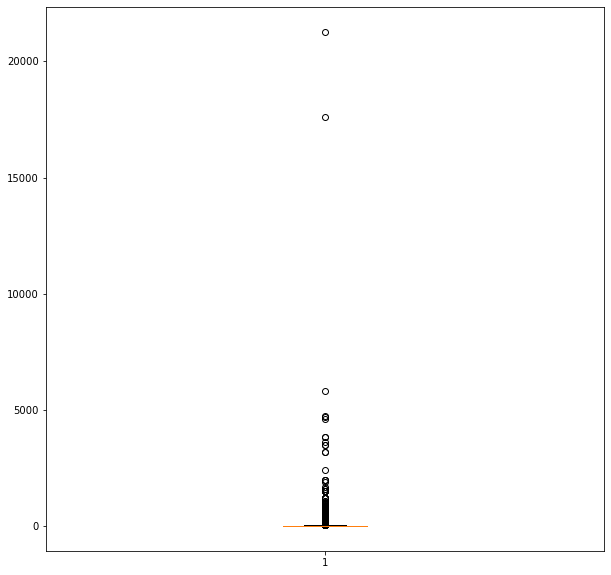

In [386]:
plt.figure(figsize=[10,10])
plt.boxplot(master_frame['raised_amount_million_usd'])
plt.show()

In [387]:
master_frame=master_frame[master_frame['raised_amount_million_usd']>2]

In [388]:
master_frame.shape

(41622, 14)

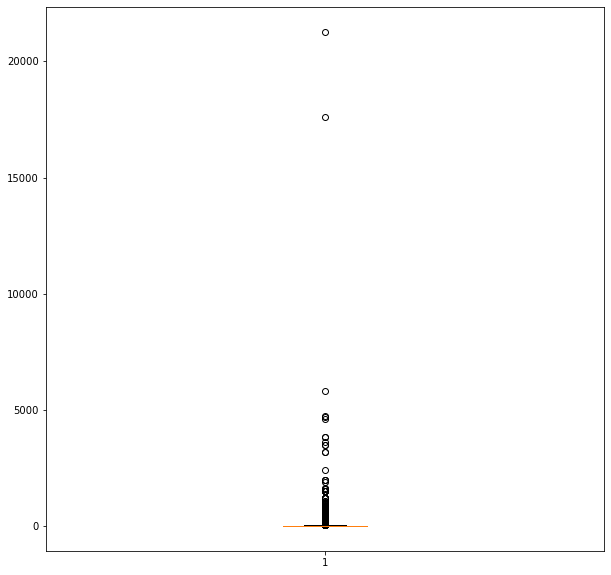

In [389]:
plt.figure(figsize=[10,10])
plt.boxplot(master_frame['raised_amount_million_usd'])
plt.show()

In [398]:
master_frame=master_frame[master_frame['raised_amount_million_usd']>17]

In [399]:
master_frame.shape

(10071, 14)

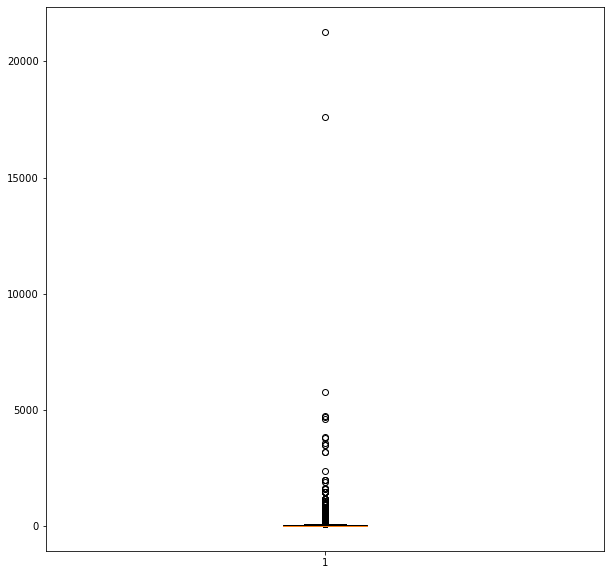

In [400]:
plt.figure(figsize=[10,10])
plt.boxplot(master_frame['raised_amount_million_usd'])
plt.show()

In [401]:
master_frame=master_frame[master_frame['raised_amount_million_usd']<5000]

In [402]:
master_frame.shape

(10068, 14)

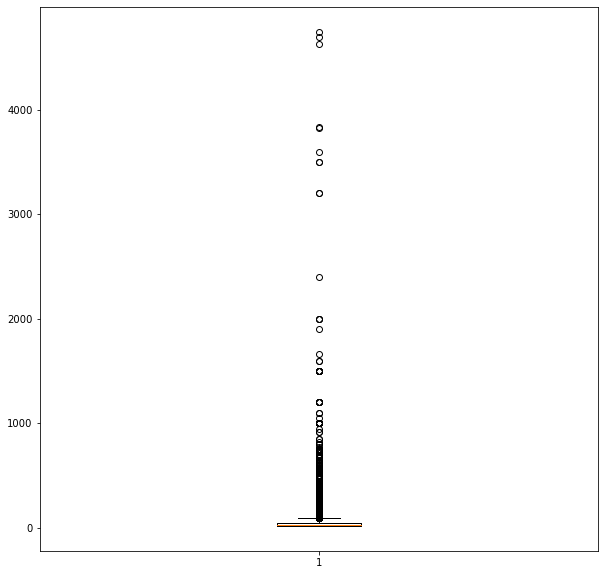

In [403]:
plt.figure(figsize=[10,10])
plt.boxplot(master_frame['raised_amount_million_usd'])
plt.show()

In [394]:
master_frame['raised_amount_million_usd'].describe()

count    13285.000000
mean        55.261153
std        284.460256
min         13.000006
25%         17.500000
50%         25.000000
75%         42.000000
max      21271.935000
Name: raised_amount_million_usd, dtype: float64

In [367]:
groupby_country_code=master_frame.groupby('country_code')
groupby_country_code['raised_amount_million_usd'].sum().sort_index()

country_code
ALB       0.276744
ARE    1570.219065
ARG     362.355489
ARM      26.817500
AUS    3839.236773
          ...     
VEN       2.619504
VNM     397.680509
ZAF    1074.812080
ZMB       0.520000
ZWE      10.030000
Name: raised_amount_million_usd, Length: 134, dtype: float64

In [368]:
#Remove above first item which doesn't relate to any country
master_frame = master_frame[master_frame['country_code']!=' http://www.dreamlines.com.au ']

In [370]:
groupby_country_code=master_frame.groupby('country_code')
arr=groupby_country_code['raised_amount_million_usd'].sum().sort_index()
print(arr)

country_code
ALB       0.276744
ARE    1570.219065
ARG     362.355489
ARM      26.817500
AUS    3839.236773
          ...     
VEN       2.619504
VNM     397.680509
ZAF    1074.812080
ZMB       0.520000
ZWE      10.030000
Name: raised_amount_million_usd, Length: 134, dtype: float64


In [371]:
master_frame = master_frame[master_frame['country_code']!='operating']

In [372]:
groupby_country_code=master_frame.groupby('country_code')
arr=groupby_country_code['raised_amount_million_usd'].sum().sort_index()[0:10]
print(arr)

country_code
ALB       0.276744
ARE    1570.219065
ARG     362.355489
ARM      26.817500
AUS    3839.236773
AUT     841.829463
AZE       0.374000
BAH      10.100000
BEL    1668.198549
BGD       8.441208
Name: raised_amount_million_usd, dtype: float64
